<a href="https://colab.research.google.com/github/CamposJoao/applied-computational-intelligence/blob/main/HomeWork3_ICA_rev02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3 - Modelos para classificação 

Thaís C. Sampaio, João Pedro Campos

Departamento de Engenharia de Teleinformática

Universidade Federal do Ceará, Fortaleza, Brasil

Emails: {thaisc, joaopedroscampos\}@alu.ufc.br}

## Objetivo

Objetivo é o estudo e implementação de modelos de classificação utilizando o dataset do kaggle chamado HR Analytics: Job Change of Data Scientists

## Ambiente para trabalho

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split #Função para divisão de treino e teste
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.svm import SVC #Support Vector Classifier - O SVM em versão de classificação
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import NearMiss 
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### Montagem do Drive para acessar o dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Acesso ao banco de dados

In [ ]:
pd.read_csv('/content/drive/MyDrive/ICA/aug_train.csv').shape

(19158, 14)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ICA/aug_train.csv')

### Exclusão da coluna gender

In [ ]:
data = df.drop(columns=['gender'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 1.9+ MB


### Substituição dos dados categóricos por escala numérica (variáveis do tipo string para tipo float)

In [ ]:
data['relevent_experience'].replace({'No relevent experience': 0}, inplace=True)
data['relevent_experience'].replace({'Has relevent experience': 1}, inplace=True)

In [ ]:
data['enrolled_university'].replace({'no_enrollment': 0}, inplace=True)
data['enrolled_university'].replace({'Part time course': 1}, inplace=True)
data['enrolled_university'].replace({'Full time course': 2}, inplace=True)

In [ ]:
data['last_new_job'].replace({'never': 0}, inplace=True)
data['last_new_job'].replace({'1': 1}, inplace=True)
data['last_new_job'].replace({'2': 2}, inplace=True)
data['last_new_job'].replace({'3': 3}, inplace=True)
data['last_new_job'].replace({'4': 4}, inplace=True)
data['last_new_job'].replace({'>4': 5}, inplace=True)

In [ ]:
data['education_level'].replace({'Primary School': 0}, inplace=True)
data['education_level'].replace({'High School': 1}, inplace=True)
data['education_level'].replace({'Graduate': 2}, inplace=True)
data['education_level'].replace({'Masters': 3}, inplace=True)
data['education_level'].replace({'Phd': 4}, inplace=True)

In [ ]:
data['company_type'].fillna('Unknown',inplace=True)
data['company_type'].replace({'Unknown': 0}, inplace=True)
data['company_type'].replace({'Other': 1}, inplace=True)
data['company_type'].replace({'Pvt Ltd': 2}, inplace=True)
data['company_type'].replace({'Early Stage Startup': 3}, inplace=True)
data['company_type'].replace({'Funded Startup': 4}, inplace=True)
data['company_type'].replace({'Public Sector': 5}, inplace=True)
data['company_type'].replace({'NGO': 6}, inplace=True)

In [ ]:
data['company_size'].fillna('Unknown',inplace=True)
data['company_size'].replace({'Unknown': 0}, inplace=True)
data['company_size'].replace({'<10': 1}, inplace=True)
data['company_size'].replace({'10/49': 2}, inplace=True)
data['company_size'].replace({'50-99': 3}, inplace=True)
data['company_size'].replace({'100-500': 4}, inplace=True)
data['company_size'].replace({'500-999': 5}, inplace=True)
data['company_size'].replace({'1000-4999': 6}, inplace=True)
data['company_size'].replace({'5000-9999': 7}, inplace=True)
data['company_size'].replace({'10000+': 8}, inplace=True)

In [ ]:
data['major_discipline'].fillna('Unknown',inplace=True)
data['major_discipline'].replace({'Unknown': 0}, inplace=True)
data['major_discipline'].replace({'No Major': 1}, inplace=True)
data['major_discipline'].replace({'Arts': 2}, inplace=True)
data['major_discipline'].replace({'Humanities': 3}, inplace=True)
data['major_discipline'].replace({'Business Degree': 4}, inplace=True)
data['major_discipline'].replace({'STEM': 5}, inplace=True)
data['major_discipline'].replace({'Other': 6}, inplace=True)

In [ ]:
data['experience'].replace({'<1': 0}, inplace=True)
data['experience'].replace({'1': 1}, inplace=True)
data['experience'].replace({'2': 2}, inplace=True)
data['experience'].replace({'3': 3}, inplace=True)
data['experience'].replace({'4': 4}, inplace=True)
data['experience'].replace({'5': 5}, inplace=True)
data['experience'].replace({'6': 6}, inplace=True)
data['experience'].replace({'7': 7}, inplace=True)
data['experience'].replace({'8': 8}, inplace=True)
data['experience'].replace({'9': 9}, inplace=True)
data['experience'].replace({'10': 10}, inplace=True)
data['experience'].replace({'11': 11}, inplace=True)
data['experience'].replace({'12': 12}, inplace=True)
data['experience'].replace({'13': 13}, inplace=True)
data['experience'].replace({'14': 14}, inplace=True)
data['experience'].replace({'15': 15}, inplace=True)
data['experience'].replace({'16': 16}, inplace=True)
data['experience'].replace({'17': 17}, inplace=True)
data['experience'].replace({'18': 18}, inplace=True)
data['experience'].replace({'19': 19}, inplace=True)
data['experience'].replace({'20': 20}, inplace=True)
data['experience'].replace({'>20': 21}, inplace=True)

In [ ]:
# Codificando o preditor (entrada) city utilizando a biblioteca label encoder
le = preprocessing.LabelEncoder()
data['city'] = le.fit_transform(data['city'])

### Eliminação dos elementos faltantes

In [ ]:
# Excluindo as observações N com dados faltantes e salvando os dados em uma nova variável:
dataframe = data.dropna()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18014 non-null  int64  
 1   city                    18014 non-null  int64  
 2   city_development_index  18014 non-null  float64
 3   relevent_experience     18014 non-null  int64  
 4   enrolled_university     18014 non-null  float64
 5   education_level         18014 non-null  float64
 6   major_discipline        18014 non-null  int64  
 7   experience              18014 non-null  float64
 8   company_size            18014 non-null  int64  
 9   company_type            18014 non-null  int64  
 10  last_new_job            18014 non-null  float64
 11  training_hours          18014 non-null  int64  
 12  target                  18014 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.9 MB


### Pré-processamento

In [ ]:
# Computanto a média, o desvio padrão e a obliquidade (skewness) do conjunto de dados:
unc_monovar = dataframe.describe().iloc[1:3,1:].append(dataframe.skew()[1:], ignore_index=True)
unc_monovar.index = ['Média','Desvio padrão','Obliquidade']
display(unc_monovar.T)

,Média,Desvio padrão,Obliquidade
city,43.989175,35.576195,0.407721
city_development_index,0.831728,0.122115,-1.045837
relevent_experience,0.732208,0.442821,-1.048885
enrolled_university,0.454258,0.799010,1.297946
education_level,2.140779,0.688510,-0.080394
major_discipline,4.224714,1.725715,-1.836905
experience,10.282447,6.760575,0.378347
company_size,3.011269,2.679525,0.476149
company_type,1.788054,1.524769,0.749646
last_new_job,2.026535,1.673468,0.787117


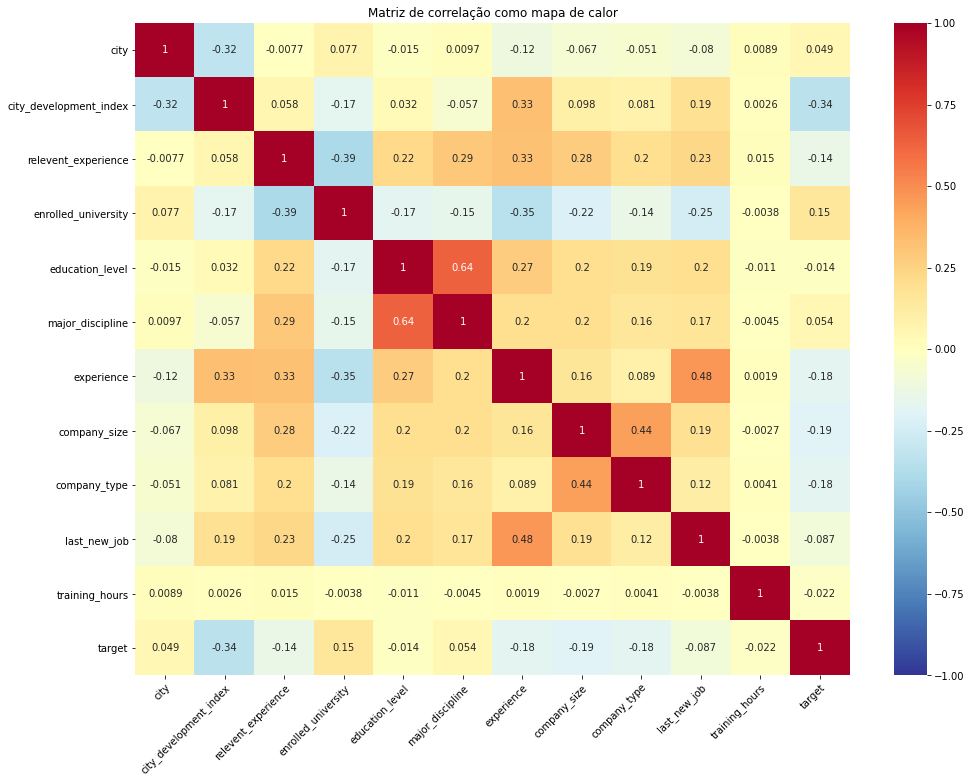

In [ ]:
# Salvando os dados em uma nova variável para calculo da correlação entre pares de preditores e entre preditores e a saída:
dftrainpredictors = dataframe.drop(columns=['enrollee_id'])
# Calculo da matriz de correlação dos dados:
data_pair_corr = dftrainpredictors.corr()
# Visualização da matriz de correlação como mapa de calor:
fig, ax = plt.subplots(figsize=(16,12))         # Tamanho da figura
ax = sns.heatmap(data_pair_corr, annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)
ax.set_title('Matriz de correlação como mapa de calor')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.savefig('matriz_correlacao_pares.pdf')
plt.show()

#### Divisão em entrada X e saída y

In [ ]:
# Escolhendo as variáveis independentes
X = dataframe[['city', 'city_development_index', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours']]

In [ ]:
# Variável dependente
y = dataframe[['target']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


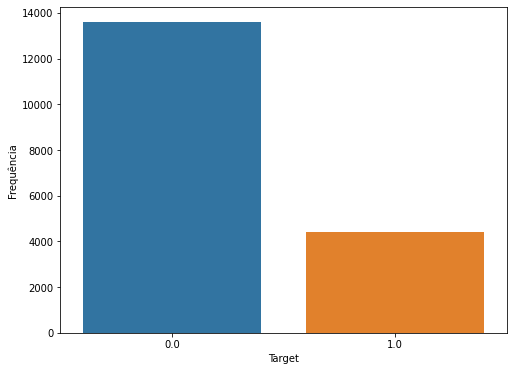

In [ ]:
T = y['target'].value_counts()  
plt.figure(figsize=[8,6])
sns.barplot(T.index, T.values)
#plt.title('Distribuição das classes')
plt.ylabel('Frequência')
plt.xlabel('Target')
plt.savefig('distribuicao-classes.pdf')
plt.show();

#### Centrar e escalonar
Para construir nosso modelo de regressão sem enviesamento precisamos centrar e escalonar os dados subtraindo a média e dividindo o resultado pelo desvio padrão com assunção que os dados tem distribuição gaussiana

In [ ]:
# Centrando e escalonando os dados (com média zero e variância unitária):
scaled_X = X.iloc[:,:]
scaled_X = (scaled_X - scaled_X.mean())/scaled_X.std()

#### Subamostragem

Undersampling

In [ ]:
nm = NearMiss()
X_sub, y_sub = nm.fit_resample(scaled_X, y)
print('Resampled dataset shape %s' % Counter(y_sub))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Resampled dataset shape Counter({0.0: 4421, 1.0: 4421})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


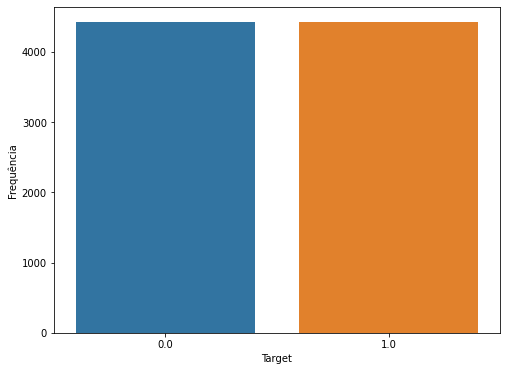

In [ ]:
plt.figure(figsize=[8,6])
sns.countplot(y_sub)
#plt.title('Distribuição das classes depois da subamostragem')
plt.ylabel('Frequência')
plt.xlabel('Target')
plt.savefig('distribuicao-classes-subamostragem.pdf')

#### Sobreamostragem 

Oversampling

In [ ]:
smote = SMOTE()
X_sobre, y_sobre = smote.fit_resample(scaled_X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Target')

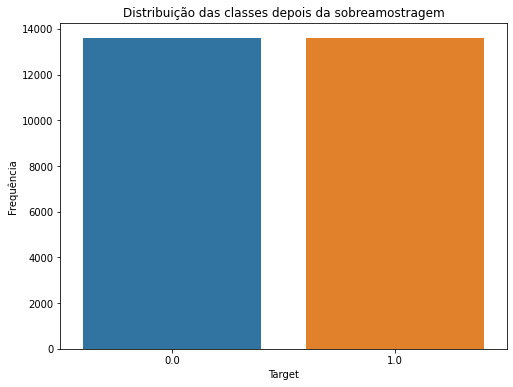

In [ ]:
plt.figure(figsize=[8,6])
sns.countplot(y_sobre)
plt.title('Distribuição das classes depois da sobreamostragem')
plt.ylabel('Frequência')
plt.xlabel('Target')

#### Divisão em treino e teste
Para construir nosso modelo de classificação precisamos dividir os dados em duas partes. Uma para treinar o modelo e outra para testar o modelo com dados que ele não conhece. Para isso iremos separar 80% dos dados para treino e 20% dos dados para teste através da biblioteca train_test_split que faz essa separação automaticamente.

**X_treino** é a parte usada para treinar o algoritmo

**X_teste** é a parte usada para testar o algoritmo depois de treinado

**y_treino** é a parte das respostas usadas no treino

**y_teste** é a parte das respostas usadas para testar o algoritmo

In [ ]:
X_treino_sub, X_teste_sub, y_treino_sub, y_teste_sub = train_test_split(X_sub, y_sub, test_size=0.2)

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(scaled_X, y, test_size=0.2)

In [ ]:
X_treino_sobre, X_teste_sobre, y_treino_sobre, y_teste_sobre = train_test_split(X_sobre, y_sobre, test_size=0.2)

## Tarefa 1 - Classificação linear

### Regressão Logística

Também pode ser chamada de Classificação Logística (Logistic Classification)

#### Treinamento do modelo

In [ ]:
# Define um modelo de classificação
modelo_logistica = LogisticRegression(max_iter=5000)

# Treina o modelo com os dados de treino
modelo_logistica.fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Define um modelo de classificação
modelo_logistica_sub = LogisticRegression(max_iter=5000)
# Treina o modelo com os dados de treino
modelo_logistica_sub.fit(X_treino_sub, y_treino_sub)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Define um modelo de classificação
modelo_logistica_sobre = LogisticRegression(max_iter=5000)
# Treina o modelo com os dados de treino
modelo_logistica_sobre.fit(X_treino_sobre, y_treino_sobre)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predição da saída

In [ ]:
# y_predito_logistica contém a previsão da mudança ou não de emprego (target) do nosso modelo de Regressão Logística
y_predito_logistica = modelo_logistica.predict(X_teste)

In [ ]:
# y_predito_logistica contém a previsão da mudança ou não de emprego (target) do nosso modelo de Regressão Logística
y_predito_logistica_sub = modelo_logistica_sub.predict(X_teste_sub)

In [ ]:
# y_predito_logistica contém a previsão da mudança ou não de emprego (target) do nosso modelo de Regressão Logística
y_predito_logistica_sobre = modelo_logistica_sobre.predict(X_teste_sobre)

#### Avaliação do modelo

In [ ]:
matriz_confusao_logistica = confusion_matrix(y_teste_sub, y_predito_logistica_sub)
tn, fp, fn, tp = confusion_matrix(y_teste_sub, y_predito_logistica_sub).ravel()

[None, None, None, None, None, None]

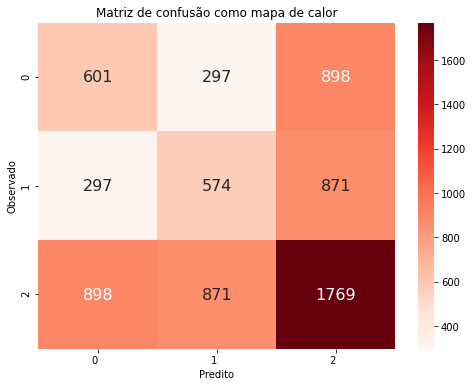

In [ ]:
matriz_confusao = [[tn,fp,tn+fp], [fn,tp,fn+tp], [tn+fn,fp+tp,tn+fp+fn+tp]]
fig, ax = plt.subplots(figsize=(8,6))         # Tamanho da figura
ax = sns.heatmap(matriz_confusao, annot=True, cmap='Reds', fmt='', annot_kws={"size": 16})
plt.ylabel('Observado')
plt.xlabel('Predito')
ax.set_title('Matriz de confusão como mapa de calor')
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

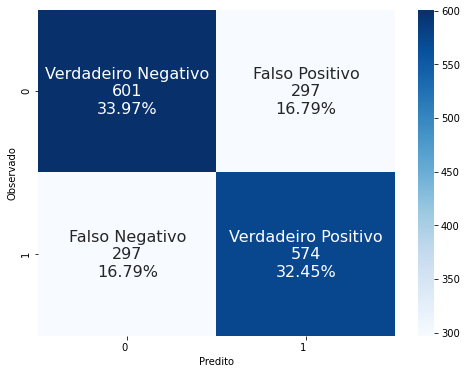

In [ ]:
group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusao_logistica.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusao_logistica.flatten()/np.sum(matriz_confusao_logistica)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(8,6))         # Tamanho da figura
ax = sns.heatmap(matriz_confusao_logistica, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 16})
plt.ylabel('Observado')
plt.xlabel('Predito')
#ax.set_title('Matriz de confusão Regressão Logística')
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
plt.savefig('matriz-de-consfusao-regressao-logistica-subamostragem.pdf')

In [ ]:
precisao_logistica = precision_score(y_teste, y_predito_logistica)
print('Pontuação da precisão (Precision Score) do modelo Regressão Logística: ',precisao_logistica*100.)
taxa_de_verdadeiro_positivo_logistica = recall_score(y_teste, y_predito_logistica)
print('Taxa de verdadeiro positivo (Recall Score) do modelo Regressão Logística: ',taxa_de_verdadeiro_positivo_logistica*100.)
taxa_de_acerto_logistica = accuracy_score(y_teste, y_predito_logistica)
print('Taxa de acerto (Accuracy Score) do modelo Regressão Logística: ', taxa_de_acerto_logistica*100.)

Pontuação da precisão (Precision Score) do modelo Regressão Logística:  56.085918854415276
Taxa de verdadeiro positivo (Recall Score) do modelo Regressão Logística:  27.293844367015097
Taxa de acerto (Accuracy Score) do modelo Regressão Logística:  77.51873438800999


In [ ]:
precisao_logistica_sub = precision_score(y_teste_sub, y_predito_logistica_sub)
print('Pontuação da precisão (Precision Score) do modelo Regressão Logística com subamostragem: ',precisao_logistica_sub*100.)
taxa_de_verdadeiro_positivo_logistica_sub = recall_score(y_teste_sub, y_predito_logistica_sub)
print('Taxa de verdadeiro positivo (Recall Score) do modelo Regressão Logística com subamostragem: ',taxa_de_verdadeiro_positivo_logistica_sub*100.)
taxa_de_acerto_logistica_sub = accuracy_score(y_teste_sub, y_predito_logistica_sub)
print('Taxa de acerto (Accuracy Score) do modelo Regressão Logística com subamostragem: ', taxa_de_acerto_logistica_sub*100.)

Pontuação da precisão (Precision Score) do modelo Regressão Logística com subamostragem:  65.90126291618829
Taxa de verdadeiro positivo (Recall Score) do modelo Regressão Logística com subamostragem:  65.90126291618829
Taxa de acerto (Accuracy Score) do modelo Regressão Logística com subamostragem:  66.42170717919728


In [ ]:
precisao_logistica_sobre = precision_score(y_teste_sobre, y_predito_logistica_sobre)
print('Pontuação da precisão (Precision Score) do modelo Regressão Logística com sobreamostragem: ',precisao_logistica_sobre*100.)
taxa_de_verdadeiro_positivo_logistica_sobre = recall_score(y_teste_sobre, y_predito_logistica_sobre)
print('Taxa de verdadeiro positivo (Recall Score) do modelo Regressão Logística com sobreamostragem: ',taxa_de_verdadeiro_positivo_logistica_sobre*100.)
taxa_de_acerto_logistica_sobre = accuracy_score(y_teste_sobre, y_predito_logistica_sobre)
print('Taxa de acerto (Accuracy Score) do modelo Regressão Logística com sobreamostragem: ', taxa_de_acerto_logistica_sobre*100.)

Pontuação da precisão (Precision Score) do modelo Regressão Logística com sobreamostragem:  72.5981308411215
Taxa de verdadeiro positivo (Recall Score) do modelo Regressão Logística com sobreamostragem:  71.44959529065488
Taxa de acerto (Accuracy Score) do modelo Regressão Logística com sobreamostragem:  72.25082751011401


<Figure size 432x288 with 0 Axes>

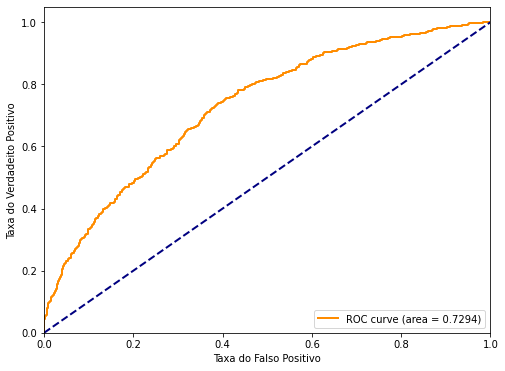

In [ ]:
fpr, tpr, _ = roc_curve(y_teste_sub, modelo_logistica_sub.decision_function(X_teste_sub))
roc_auc = auc(fpr, tpr)

plt.figure()
fig, ax = plt.subplots(figsize=(8,6))         # Tamanho da figura
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa do Falso Positivo')
plt.ylabel('Taxa do Verdadeito Positivo')
#plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.savefig('ROC-regressao-logistica-subamostragem.pdf')
plt.show()


### Análise Discriminante Linear

Linear Discriminant Analysis (LDA)

#### Treinamento do modelo

In [ ]:
# Define um modelo de classificação
modelo_lda = LinearDiscriminantAnalysis()

# Treina o modelo com os dados de treino
modelo_lda.fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
# Define um modelo de classificação
modelo_lda_sub = LinearDiscriminantAnalysis()

# Treina o modelo com os dados de treino
modelo_lda_sub.fit(X_treino_sub, y_treino_sub)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
# Define um modelo de classificação
modelo_lda_sobre = LinearDiscriminantAnalysis()

# Treina o modelo com os dados de treino
modelo_lda_sobre.fit(X_treino_sobre, y_treino_sobre)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

#### Predição da saída

In [ ]:
# y_predito_lda contém a previsão da mudança ou não de emprego (target) do nosso modelo de Análise Discriminate Linear
y_predito_lda = modelo_lda.predict(X_teste)

In [ ]:
# y_predito_lda_sub contém a previsão da mudança ou não de emprego (target) do nosso modelo de Análise Discriminate Linear
y_predito_lda_sub = modelo_lda.predict(X_teste_sub)

In [ ]:
# y_predito_lda_sobre contém a previsão da mudança ou não de emprego (target) do nosso modelo de Análise Discriminate Linear
y_predito_lda_sobre = modelo_lda.predict(X_teste_sobre)

#### Avaliação do modelo

In [ ]:
matriz_confusao_lda = confusion_matrix(y_teste_sub, y_predito_lda_sub)

[None, None, None, None]

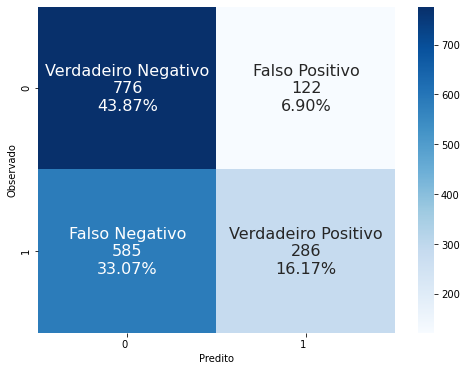

In [ ]:
group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusao_lda.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusao_lda.flatten()/np.sum(matriz_confusao_lda)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(8,6))         # Tamanho da figura
ax = sns.heatmap(matriz_confusao_lda, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 16})
plt.ylabel('Observado')
plt.xlabel('Predito')
plt.savefig('matriz-de-confusao-LDA-subamostragem.pdf')
#ax.set_title('Matriz de confusão Análise Discriminante Linear (LDA)')
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

In [ ]:
precisao_lda = precision_score(y_teste, y_predito_lda)
print(precisao_lda*100.)
taxa_de_acerto_lda = accuracy_score(y_teste, y_predito_lda)
print(taxa_de_acerto_lda*100.)
taxa_de_verdadeiro_positivo_lda = recall_score(y_teste, y_predito_lda)
print(taxa_de_verdadeiro_positivo_lda*100.)

54.70941883767535
77.40771579239522
31.70731707317073


In [ ]:
precisao_lda_sub = precision_score(y_teste_sub, y_predito_lda_sub)
print(precisao_lda_sub*100.)
taxa_de_acerto_lda_sub = accuracy_score(y_teste_sub, y_predito_lda_sub)
print(taxa_de_acerto_lda_sub*100.)
taxa_de_verdadeiro_positivo_lda_sub = recall_score(y_teste_sub, y_predito_lda_sub)
print(taxa_de_verdadeiro_positivo_lda_sub*100.)

70.09803921568627
60.033917467495755
32.83582089552239


In [ ]:
precisao_lda_sobre = precision_score(y_teste_sobre, y_predito_lda_sobre)
print(precisao_lda_sobre*100.)
taxa_de_acerto_lda_sobre = accuracy_score(y_teste_sobre, y_predito_lda_sobre)
print(taxa_de_acerto_lda_sobre*100.)
taxa_de_verdadeiro_positivo_lda_sobre = recall_score(y_teste_sobre, y_predito_lda_sobre)
print(taxa_de_verdadeiro_positivo_lda_sobre*100.)

79.32296431838975
61.80581095991173
31.898454746136867


<Figure size 432x288 with 0 Axes>

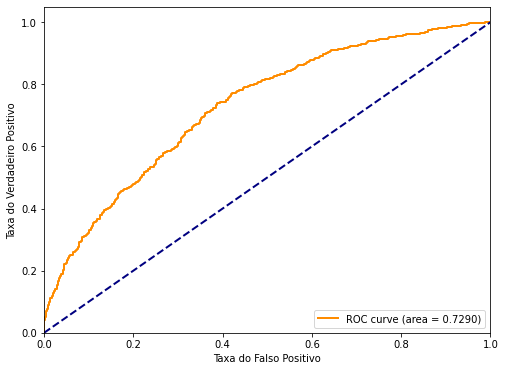

In [ ]:
fpr, tpr, _ = roc_curve(y_teste_sub, modelo_lda_sub.decision_function(X_teste_sub))
roc_auc = auc(fpr, tpr)

plt.figure()
fig, ax = plt.subplots(figsize=(8,6))         # Tamanho da figura
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa do Falso Positivo')
plt.ylabel('Taxa do Verdadeiro Positivo')
#plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.savefig('ROC-LDA-subamostragem.pdf')
plt.show()


## Tarefa 2 - Classificação não linear

### Máquinas de Vetores de Suporte 

Support Vector Machines (SVM)

#### Treinamento do modelo

In [ ]:
modelo_svm_linear = SVC(kernel='linear',C=1.0) #Implementação do modelo e C é a medida do quanto o modelo pode errar, se aumentar o C ele vai permitir mais erros no treinamento e melhorar a margem de teste
modelo_svm_linear.fit(X_treino,y_treino) #Treinamento do modelo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
modelo_svm_poly = SVC(kernel='poly',degree=3)  #Implementação do modelo utilizando kernel polinomial de grau 3, elevar a função a grau 3
modelo_svm_poly.fit(X_treino,y_treino) #Treinamento do modelo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
modelo_svm_rbf = SVC(kernel='rbf') #Implementação do modelo utilizando kernel RBF
modelo_svm_rbf.fit(X_treino,y_treino) #Treinamento do modelo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
modelo_svm_rbf_sub = SVC(kernel='rbf') #Implementação do modelo utilizando kernel RBF
modelo_svm_rbf_sub.fit(X_treino_sub,y_treino_sub) #Treinamento do modelo

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predição da saída

In [ ]:
# y_predito_svm_linear contém a previsão da mudança ou não de emprego (target) do nosso modelo de SVM com kernel linear
y_predito_svm_linear = modelo_svm_linear.predict(X_teste)

In [ ]:
# y_predito_svm_poly contém a previsão da mudança ou não de emprego (target) do nosso modelo de SVM com kernel de grau 3
y_predito_svm_poly = modelo_svm_poly.predict(X_teste)

In [ ]:
# y_predito_svm_rbf contém a previsão da mudança ou não de emprego (target) do nosso modelo de SVM com kernel RBF
y_predito_svm_rbf = modelo_svm_rbf.predict(X_teste)

In [ ]:
# y_predito_svm_rbf contém a previsão da mudança ou não de emprego (target) do nosso modelo de SVM com kernel RBF
y_predito_svm_rbf_sub = modelo_svm_rbf_sub.predict(X_teste_sub)

#### Avaliação do modelo

In [ ]:
taxa_de_acerto_svm_linear = accuracy_score(y_teste, y_predito_svm_linear)
print(taxa_de_acerto_svm_linear*100.)

76.10324729392173


In [ ]:
taxa_de_acerto_svm_poly = accuracy_score(y_teste, y_predito_svm_poly)
print(taxa_de_acerto_svm_poly*100.)

77.79628087704691


In [ ]:
matriz_confusao_svm_rbf = confusion_matrix(y_teste_sub, y_predito_svm_rbf_sub)

[None, None, None, None]

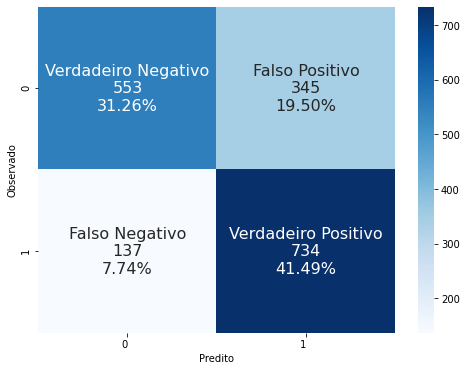

In [ ]:
group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusao_svm_rbf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusao_svm_rbf.flatten()/np.sum(matriz_confusao_svm_rbf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(8,6))         # Tamanho da figura
ax = sns.heatmap(matriz_confusao_svm_rbf, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 16})
plt.ylabel('Observado')
plt.xlabel('Predito')
plt.savefig('matriz-de-confusao-SVM-subamostragem.pdf')
#ax.set_title('Matriz de confusão Análise Discriminante Linear (LDA)')
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

In [ ]:
precisao_svm_rbf = precision_score(y_teste, y_predito_svm_rbf)
print(precisao_svm_rbf*100.)

55.03448275862068


In [ ]:
taxa_de_verdadeiro_positivo_svm_rbf = recall_score(y_teste, y_predito_svm_rbf)
print(taxa_de_verdadeiro_positivo_svm_rbf*100.)

46.34146341463415


In [ ]:
taxa_de_acerto_svm_rbf = accuracy_score(y_teste, y_predito_svm_rbf)
print(taxa_de_acerto_svm_rbf*100.)

78.12933666389121


In [ ]:
precisao_svm_rbf_sub = precision_score(y_teste_sub, y_predito_svm_rbf_sub)
print(precisao_svm_rbf_sub*100.)
taxa_de_verdadeiro_positivo_svm_rbf_sub = recall_score(y_teste_sub, y_predito_svm_rbf_sub)
print(taxa_de_verdadeiro_positivo_svm_rbf_sub*100.)
taxa_de_acerto_svm_rbf_sub = accuracy_score(y_teste_sub, y_predito_svm_rbf_sub)
print(taxa_de_acerto_svm_rbf_sub*100.)

68.0259499536608
84.27095292766934
72.75296777840587


<Figure size 432x288 with 0 Axes>

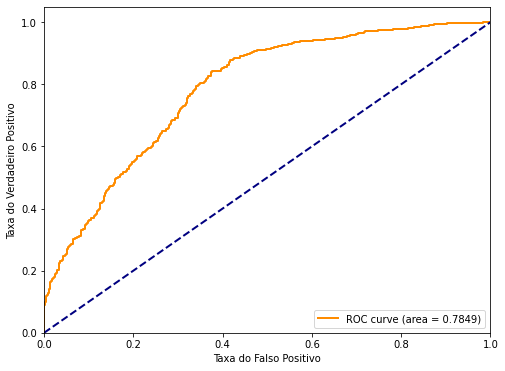

In [ ]:
fpr, tpr, _ = roc_curve(y_teste_sub, modelo_svm_rbf_sub.decision_function(X_teste_sub))
roc_auc = auc(fpr, tpr)

plt.figure()
fig, ax = plt.subplots(figsize=(8,6))         # Tamanho da figura
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa do Falso Positivo')
plt.ylabel('Taxa do Verdadeiro Positivo')
#plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.savefig('ROC-SVM-subamostragem.pdf')
plt.show()

### K-vizinhos mais próximos

K-Nearest Neighbors (KNN)

#### Busca do K ótimo

In [ ]:
kvizinhos = []
taxa_de_erro = []
taxa_de_acerto = []
def scorek(N):
  modelo_knn_sub = KNeighborsClassifier(n_neighbors=N)
  modelo_knn_sub.fit(X_treino_sub,y_treino_sub)
  return 1 - modelo_knn_sub.score(X_teste_sub, y_teste_sub)
for i in range(1,100):
  taxa_de_erro.append(scorek(i))
  kvizinhos.append(i)

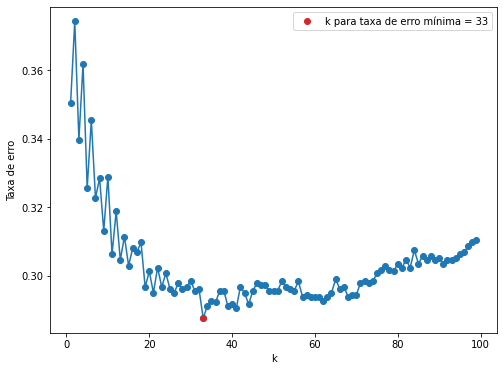

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(kvizinhos,taxa_de_erro, 'o-')
plt.plot(kvizinhos[np.argmin(taxa_de_erro)], np.min(taxa_de_erro), 'C3o', label=f'k para taxa de erro mínima = {kvizinhos[np.argmin(taxa_de_erro)]}')
#plt.title('Valor de k ótimo')
plt.legend()
plt.xlabel('k')
plt.ylabel('Taxa de erro')
plt.savefig('K-otimo-KNN-subamostragem.pdf')

#### Treinamento do modelo

In [ ]:
modelo_knn_otimo_sub = KNeighborsClassifier(n_neighbors=33) #Modelo que compara um novo dado aos 33 vizinhos mais próximos a ele
modelo_knn_otimo_sub.fit(X_treino_sub,y_treino_sub) #Treinamento do modelo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

#### Predição da saída

In [ ]:
# y_predito_knn_otimo contém a previsão da mudança ou não de emprego (target) do nosso modelo de KNN
y_predito_knn_otimo_sub = modelo_knn_otimo_sub.predict(X_teste_sub)

#### Avaliação do modelo

In [ ]:
matriz_confusao_knn_otimo = confusion_matrix(y_teste_sub, y_predito_knn_otimo_sub)

[None, None, None, None]

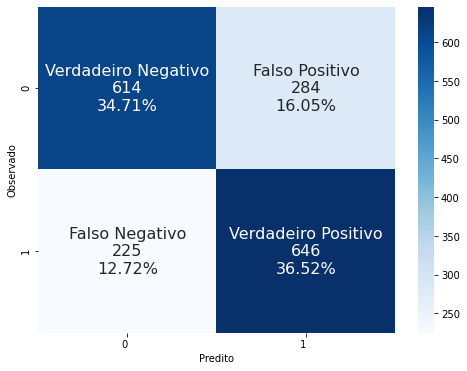

In [ ]:
group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusao_knn_otimo.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusao_knn_otimo.flatten()/np.sum(matriz_confusao_knn_otimo)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(8,6))         # Tamanho da figura
ax = sns.heatmap(matriz_confusao_knn_otimo, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 16})
plt.ylabel('Observado')
plt.xlabel('Predito')
plt.savefig('matriz-de-confusao-KNN-subamostragem.pdf')
#ax.set_title('Matriz de confusão K-vizinhos mais próximos (KNN)')
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

In [ ]:
precisao_knn_otimo_sub = precision_score(y_teste_sub, y_predito_knn_otimo_sub)
print(precisao_knn_otimo_sub*100.)

69.46236559139784


In [ ]:
taxa_de_verdadeiro_positivo_knn_otimo_sub = recall_score(y_teste_sub, y_predito_knn_otimo_sub)
print(taxa_de_verdadeiro_positivo_knn_otimo_sub*100.)

74.16762342135476


In [ ]:
taxa_de_acerto_knn_otimo_sub = accuracy_score(y_teste_sub, y_predito_knn_otimo_sub)
print(taxa_de_acerto_knn_otimo_sub*100.)

71.22668174109667


<Figure size 432x288 with 0 Axes>

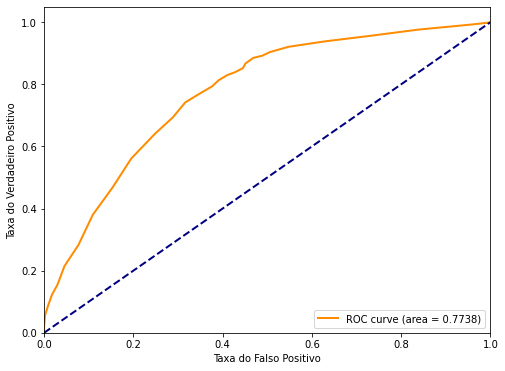

In [ ]:
y_predito_proba = modelo_knn_otimo_sub.predict_proba(X_teste_sub)[:,1]


fpr, tpr, _ = roc_curve(y_teste_sub, y_predito_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.figure(figsize=[8,6])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa do Falso Positivo')
plt.ylabel('Taxa do Verdadeiro Positivo')
#plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.savefig('ROC-KNN-subamostragem.pdf')
plt.show()

### Análise Discriminante Quadrático

Quadratic Discriminant Analysis (QDA)

#### Treinamento do modelo

In [ ]:
# Define um modelo de classificação
modelo_qda = QuadraticDiscriminantAnalysis()

# Treina o modelo com os dados de treino
modelo_qda.fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
# Define um modelo de classificação
modelo_qda_sub = QuadraticDiscriminantAnalysis()

# Treina o modelo com os dados de treino
modelo_qda_sub.fit(X_treino_sub, y_treino_sub)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
# Define um modelo de classificação
modelo_qda_sobre = QuadraticDiscriminantAnalysis()

# Treina o modelo com os dados de treino
modelo_qda_sobre.fit(X_treino_sobre, y_treino_sobre)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

#### Predição da saída

In [ ]:
# y_predito_qda contém a previsão da mudança ou não de emprego (target) do nosso modelo de Análise Discriminate Quadrático
y_predito_qda = modelo_qda.predict(X_teste)

In [ ]:
# y_predito_qda_sub contém a previsão da mudança ou não de emprego (target) do nosso modelo de Análise Discriminate Quadrático
y_predito_qda_sub = modelo_qda_sub.predict(X_teste_sub)

In [ ]:
# y_predito_qda_sobre contém a previsão da mudança ou não de emprego (target) do nosso modelo de Análise Discriminate Quadrático
y_predito_qda_sobre = modelo_qda_sobre.predict(X_teste_sobre)

#### Avaliação do modelo

In [ ]:
matriz_confusao_qda = confusion_matrix(y_teste_sub, y_predito_qda_sub)

[None, None, None, None]

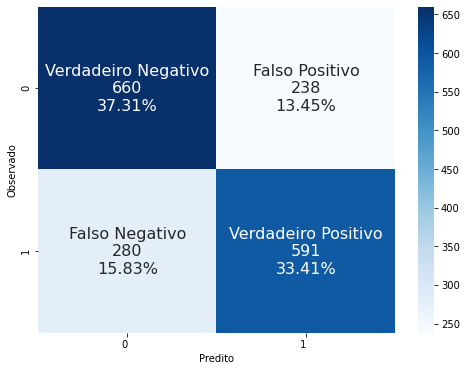

In [ ]:
group_names = ['Verdadeiro Negativo','Falso Positivo','Falso Negativo','Verdadeiro Positivo']
group_counts = ["{0:0.0f}".format(value) for value in
                matriz_confusao_qda.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matriz_confusao_qda.flatten()/np.sum(matriz_confusao_qda)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(8,6))         # Tamanho da figura
ax = sns.heatmap(matriz_confusao_qda, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 16})
plt.ylabel('Observado')
plt.xlabel('Predito')
plt.savefig('matriz-de-confusao-QDA-subamostragem.pdf')
#ax.set_title('Matriz de confusão Análise Discriminante Quadrático (QDA)')
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

In [ ]:
precisao_qda = precision_score(y_teste, y_predito_qda)
print(precisao_qda*100.)
taxa_de_verdadeiro_positivo_qda = recall_score(y_teste, y_predito_qda)
print(taxa_de_verdadeiro_positivo_qda*100.)
taxa_de_acerto_qda = accuracy_score(y_teste, y_predito_qda)
print(taxa_de_acerto_qda*100.)

52.29142185663925
51.68408826945412
77.18567860116569


In [ ]:
precisao_qda_sub = precision_score(y_teste_sub, y_predito_qda_sub)
print(precisao_qda_sub*100.)
taxa_de_verdadeiro_positivo_qda_sub = recall_score(y_teste_sub, y_predito_qda_sub)
print(taxa_de_verdadeiro_positivo_qda_sub*100.)
taxa_de_acerto_qda_sub = accuracy_score(y_teste_sub, y_predito_qda_sub)
print(taxa_de_acerto_qda_sub*100.)

71.29071170084438
67.85304247990815
70.71791972866026


In [ ]:
precisao_qda_sobre = precision_score(y_teste_sobre, y_predito_qda_sobre)
print(precisao_qda_sobre*100.)
taxa_de_verdadeiro_positivo_qda_sobre = recall_score(y_teste_sobre, y_predito_qda_sobre)
print(taxa_de_verdadeiro_positivo_qda*100.)
taxa_de_acerto_qda_sobre = accuracy_score(y_teste_sobre, y_predito_qda_sobre)
print(taxa_de_acerto_qda*100.)

72.50625670361102
51.68408826945412
77.18567860116569


<Figure size 432x288 with 0 Axes>

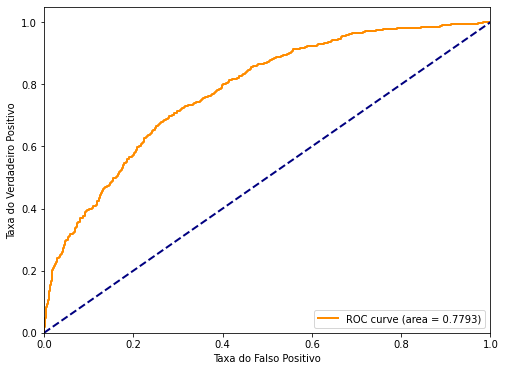

In [ ]:
fpr, tpr, _ = roc_curve(y_teste_sub, modelo_qda_sub.decision_function(X_teste_sub))
roc_auc = auc(fpr, tpr)

plt.figure()
fig, ax = plt.subplots(figsize=(8,6))         # Tamanho da figura
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa do Falso Positivo')
plt.ylabel('Taxa do Verdadeiro Positivo')
#plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.savefig('ROC-QDA-subamostragem.pdf')
plt.show()

## Tarefa 3 - Classificação linear versus Classificação não linear